# Práctica 2 - Segmentación

### Patricia Córdoba Hidalgo

Importamos las librerías que usaremos

In [1]:
import pandas as pd
import numpy as np
from pract2_utils import * 

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [2]:
datos = pd.read_csv("accidentes_2013.csv", na_values=["?"]) # Leemos los datos del csv

In [3]:
def grafica(data, label, title, xlab, ylab):
    plt.plot(data,label, c='b')
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)

    plt.show()

def graf_barras(data, label, title, xlab, ylab):
    fig, ax = plt.subplots()
    ax.bar(data, label, color='lime')
    ax.set_title(title)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)

## Escenario 1: Choque frontal en carretera convencional 

### Selección de datos

Estudiaremos los datos que representen choques frontales en carreteras convencionales. 

In [4]:
# Seleccionamos los datos con los que trabajaremos
caso1 = datos[datos.TIPO_VIA == 'VÍA CONVENCIONAL']
caso1 = caso1[caso1.TIPO_ACCIDENTE == 'Colisión de vehículos en marcha (Frontal)']
caso1.head()

,MES,HORA,DIASEMANA,PROVINCIA,COMUNIDAD_AUTONOMA,ISLA,TOT_VICTIMAS,TOT_VICTIMAS30D,TOT_MUERTOS,TOT_MUERTOS30D,...,PRIORIDAD,SUPERFICIE_CALZADA,LUMINOSIDAD,FACTORES_ATMOSFERICOS,VISIBILIDAD_RESTRINGIDA,OTRA_CIRCUNSTANCIA,ACERAS,TIPO_ACCIDENTE,DENSIDAD_CIRCULACION,MEDIDAS_ESPECIALES
75,4,19.0,4,Barcelona,Cataluña,NO_ES_ISLA,2,2,0,0.0,...,NaN,MOJADA,CREPÚSCULO,LLUVIA FUERTE,NaN,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Frontal),NaN,NaN
132,12,21.0,7,Girona,Cataluña,NO_ES_ISLA,3,3,0,0.0,...,SEÑAL DE STOP,MOJADA,NOCHE: SIN ILUMINACIÓN,BUEN TIEMPO,NaN,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Frontal),NaN,NaN
139,5,15.0,5,Girona,Cataluña,NO_ES_ISLA,1,1,0,0.0,...,NaN,MOJADA,PLENO DÍA,BUEN TIEMPO,NaN,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Frontal),NaN,NaN
146,12,3.0,7,Lleida,Cataluña,NO_ES_ISLA,3,3,0,0.0,...,NaN,SECA Y LIMPIA,NOCHE: SIN ILUMINACIÓN,BUEN TIEMPO,DESLUMBRAMIENTO,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Frontal),FLUIDA,NINGUNA MEDIDA
150,3,15.0,6,Barcelona,Cataluña,NO_ES_ISLA,2,2,0,0.0,...,NaN,SECA Y LIMPIA,PLENO DÍA,BUEN TIEMPO,NaN,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Frontal),NaN,NaN


In [5]:
# Los atributos a considerar son:
atributos = ['TOT_VICTIMAS', 'TOT_MUERTOS', 'TOT_HERIDOS_GRAVES', 'TOT_HERIDOS_LEVES', 'TOT_VEHICULOS_IMPLICADOS']

In [6]:
# Creamos la matriz con los atributos considerados. No hay valores nulos.
caso1 = caso1[atributos]
caso1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1448 entries, 75 to 88793
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   TOT_VICTIMAS              1448 non-null   int64
 1   TOT_MUERTOS               1448 non-null   int64
 2   TOT_HERIDOS_GRAVES        1448 non-null   int64
 3   TOT_HERIDOS_LEVES         1448 non-null   int64
 4   TOT_VEHICULOS_IMPLICADOS  1448 non-null   int64
dtypes: int64(5)
memory usage: 67.9 KB


### Normalización de los datos

In [7]:
# Le aplicamos normalización a los datos
scaler = MinMaxScaler()
caso1_norm = scaler.fit_transform(caso1)
caso1_norm[:5]

array([[0.06666667, 0.        , 0.        , 0.14285714, 0.2       ],
       [0.13333333, 0.        , 0.        , 0.21428571, 0.2       ],
       [0.        , 0.        , 0.        , 0.07142857, 0.2       ],
       [0.13333333, 0.        , 0.4       , 0.07142857, 0.2       ],
       [0.06666667, 0.        , 0.        , 0.14285714, 0.2       ]])

### Algoritmos de clustering

#### K-Means

Seleccionamos el número de clusters a usar.

In [8]:
# Vectores con los valores de las métricas
s = []
c = []

for i in range(2,15):
    results = KMeans(n_clusters=i, random_state=0).fit(caso1_norm)
    silhouette, calinski = measures_silhoutte_calinski(caso1_norm, results.labels_)
    s.append(silhouette)
    c.append(calinski)

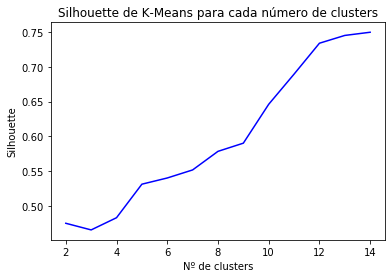

In [9]:
grafica(range(2,15), s, 'Silhouette de K-Means para cada número de clusters', 'Nº de clusters', 'Silhouette')

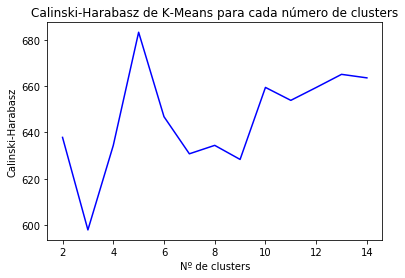

In [10]:
grafica(range(2,15), c, 'Calinski-Harabasz de K-Means para cada número de clusters', 'Nº de clusters', 'Calinski-Harabasz')

In [11]:
print("Silhouette: \n" + str(s))
print()
print("Calinski-Harabasz: \n" + str(c))

Silhouette: 
[0.4755151052183165, 0.46599969633063965, 0.48348908673333896, 0.531569055229591, 0.5404576589330072, 0.5519986909803548, 0.5786471085948179, 0.5903779353773022, 0.6461326222918197, 0.6893747693555886, 0.7336714808160643, 0.7448415168530551, 0.749410469848095]

Calinski-Harabasz: 
[637.8831140088855, 597.9798532808658, 634.4016355078425, 683.2263367508311, 646.8004817570682, 630.8036708742871, 634.4445453990445, 628.3756258948337, 659.4342926638305, 653.852874658656, 659.3965542394021, 665.0690582901761, 663.5502144820157]


Elegimos usar 5 clusters.

[0.5124309392265194, 0.08080110497237569, 0.18646408839779005, 0.07527624309392265, 0.14502762430939226]


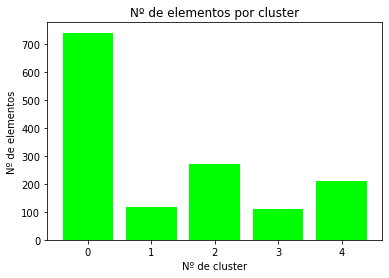

In [12]:
results5 = KMeans(n_clusters=5, random_state=0).fit(caso1_norm)

# Número de elementos por cluster
m = [0 for i in range(5)]

for i in range(len(caso1_norm)):
    m[results5.labels_[i]]+=1
    
graf_barras(range(5), m, "Nº de elementos por cluster","Nº de cluster","Nº de elementos")
print([m[i]/len(caso1) for i in range(len(m))])

In [13]:
# Métricas del modelo
silhouette, calinski = measures_silhoutte_calinski(caso1_norm, results5.labels_)

print("silhouette: {:3f}".format(silhouette))
print("calinsky: {:3f}".format(calinski))

silhouette: 0.531569
calinsky: 683.226337


Visualizamos los centroides.

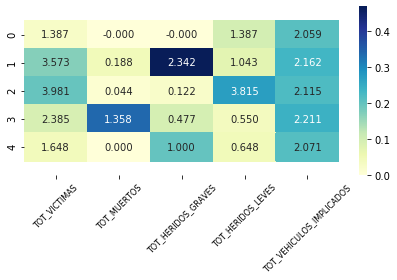

In [14]:
centroids = results5.cluster_centers_
visualize_centroids(centroids, np.array(caso1), atributos)

Visualizamos otras gráficas

/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


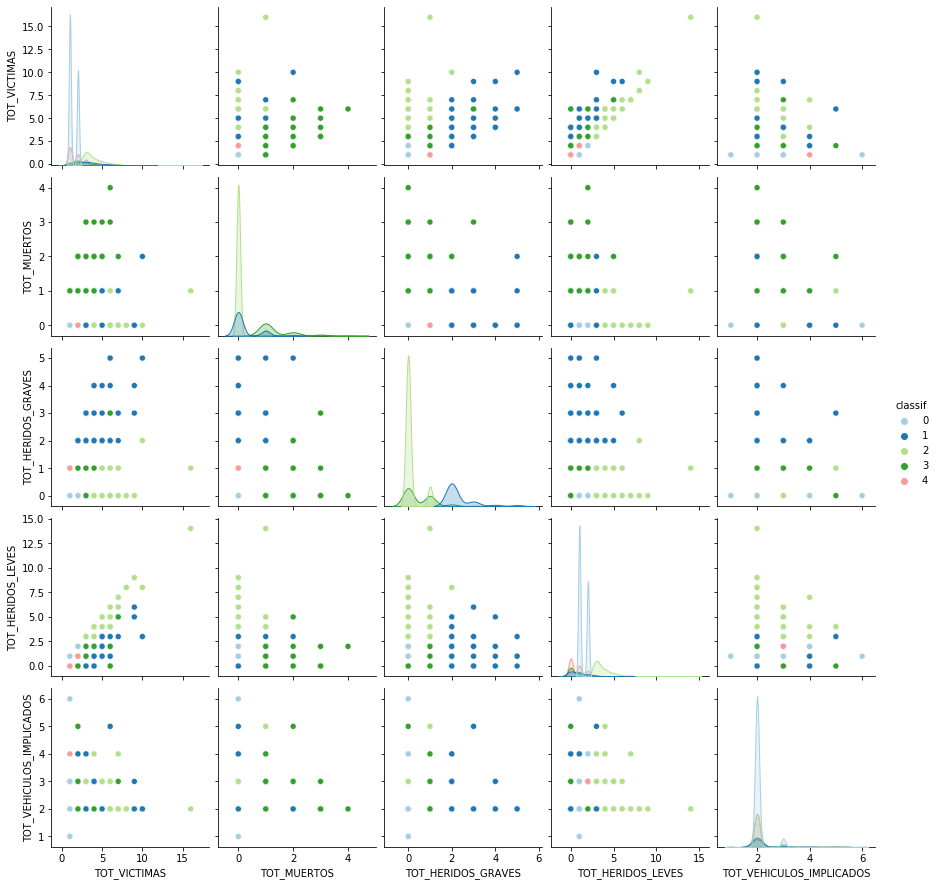

In [15]:
 pairplot(caso1, atributos, results5.labels_)

Visualizamos los diagramas de cajas:

In [16]:
# Creamos una estructura con los datos y el cluster al que pertenece cada instancia
datos_bp = caso1.copy()
datos_bp['Cluster'] = results5.labels_
datos_bp.head()

,TOT_VICTIMAS,TOT_MUERTOS,TOT_HERIDOS_GRAVES,TOT_HERIDOS_LEVES,TOT_VEHICULOS_IMPLICADOS,Cluster
75,2,0,0,2,2,0
132,3,0,0,3,2,2
139,1,0,0,1,2,0
146,3,0,2,1,2,1
150,2,0,0,2,2,0


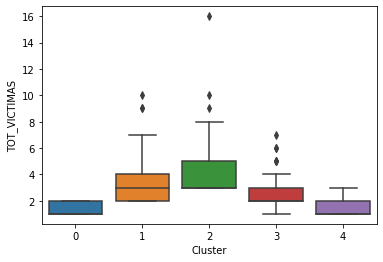

In [17]:
sns.boxplot(data=datos_bp, y='TOT_VICTIMAS', x='Cluster')

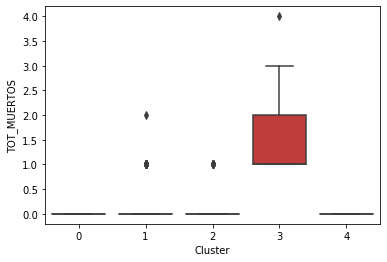

In [18]:
sns.boxplot(data=datos_bp, y='TOT_MUERTOS', x='Cluster')

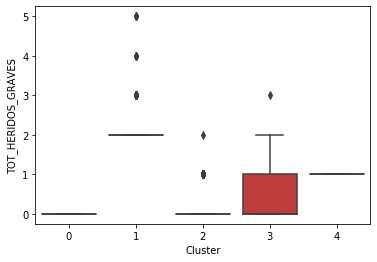

In [19]:
sns.boxplot(data=datos_bp, y='TOT_HERIDOS_GRAVES', x='Cluster')

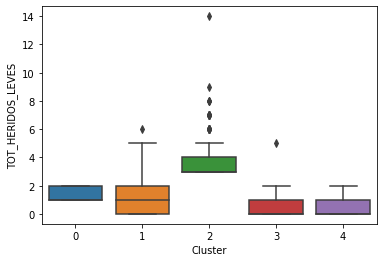

In [20]:
sns.boxplot(data=datos_bp, y='TOT_HERIDOS_LEVES', x='Cluster')

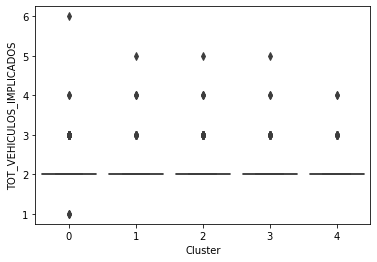

In [21]:
sns.boxplot(data=datos_bp, y='TOT_VEHICULOS_IMPLICADOS', x='Cluster')

#### DBSCAN

Seleccionamos los parámetros a usar.

In [22]:
# Vectores con los valores de las métricas
s = []
c = []

for i in np.linspace(0.02, 0.2, num=10):
    results = DBSCAN(eps=i, min_samples=5).fit(caso1_norm)
    silhouette, calinski = measures_silhoutte_calinski(caso1_norm, results.labels_)
    s.append(silhouette)
    c.append(calinski)

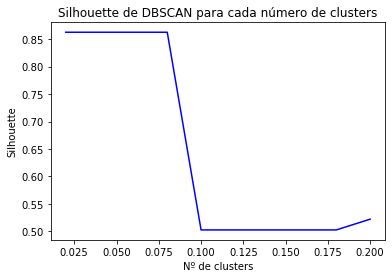

In [23]:
grafica(np.linspace(0.02, 0.2, num=10), s, 'Silhouette de DBSCAN para cada número de clusters', 'Nº de clusters', 'Silhouette')

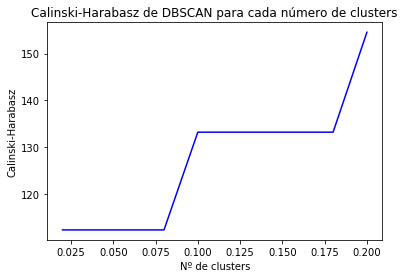

In [24]:
grafica(np.linspace(0.02, 0.2, num=10), c, 'Calinski-Harabasz de DBSCAN para cada número de clusters', 'Nº de clusters', 'Calinski-Harabasz')

In [25]:
print("Silhouette: \n" + str(s))
print()
print("Calinski-Harabasz: \n" + str(c))

Silhouette: 
[0.8625282937916661, 0.8625282937916661, 0.8625282937916661, 0.8625282937916661, 0.5025984766300052, 0.5025984766300052, 0.5025984766300052, 0.5025984766300052, 0.502598476630005, 0.5221811203009754]

Calinski-Harabasz: 
[112.37177969144075, 112.37177969144075, 112.37177969144075, 112.37177969144075, 133.23030691481816, 133.23030691481816, 133.23030691481816, 133.23030691481816, 133.23030691481816, 154.55497718151375]


Elegimos eps=0.08.

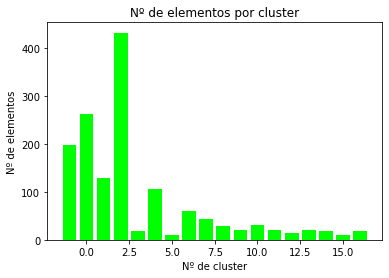

In [26]:
results = DBSCAN(eps=0.08, min_samples=10).fit(caso1_norm)
n = len(np.unique(results.labels_))

# Número de elementos por cluster
m = [0 for i in range(n)]

for i in range(len(caso1_norm)):
    if results.labels_[i]!=-1:
        m[results.labels_[i]+1]+=1
    else:
        m[0]+=1
        
graf_barras(range(-1,n-1), m, "Nº de elementos por cluster","Nº de cluster","Nº de elementos")

In [27]:
# Métricas del modelo
silhouette, calinski = measures_silhoutte_calinski(caso1_norm, results.labels_)

print("silhouette: {:3f}".format(silhouette))
print("calinsky: {:3f}".format(calinski))

silhouette: 0.789529
calinsky: 114.455327


Visualizamos los centroides.

In [28]:
# Creamos una estructura con los datos y el cluster al que pertenece cada instancia
datos_cen = caso1.copy()
datos_cen.columns = atributos
datos_cen['Cluster'] = results.labels_
datos_cen.head()

,TOT_VICTIMAS,TOT_MUERTOS,TOT_HERIDOS_GRAVES,TOT_HERIDOS_LEVES,TOT_VEHICULOS_IMPLICADOS,Cluster
75,2,0,0,2,2,0
132,3,0,0,3,2,1
139,1,0,0,1,2,2
146,3,0,2,1,2,3
150,2,0,0,2,2,0


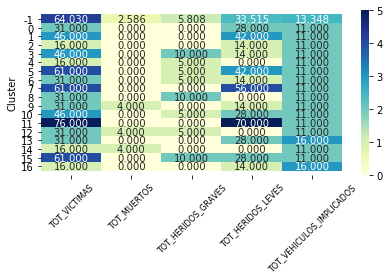

In [29]:
centroids = datos_cen.groupby('Cluster').mean()
visualize_centroids(centroids, np.array(caso1), atributos)

/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 var

/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


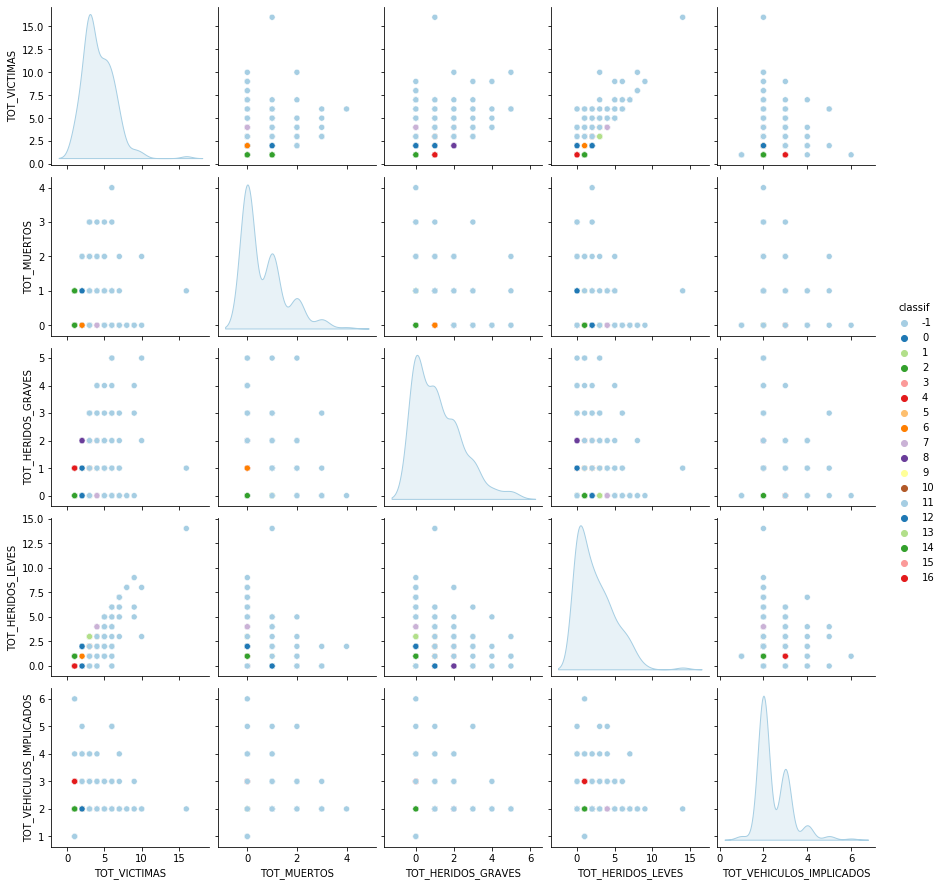

In [30]:
pairplot(caso1, atributos, results.labels_)

In [31]:
# Creamos una estructura con los datos y el cluster al que pertenece cada instancia
datos_bp = pd.DataFrame(caso1)
datos_bp['Cluster'] = results.labels_
datos_bp.head()

,TOT_VICTIMAS,TOT_MUERTOS,TOT_HERIDOS_GRAVES,TOT_HERIDOS_LEVES,TOT_VEHICULOS_IMPLICADOS,Cluster
75,2,0,0,2,2,0
132,3,0,0,3,2,1
139,1,0,0,1,2,2
146,3,0,2,1,2,3
150,2,0,0,2,2,0


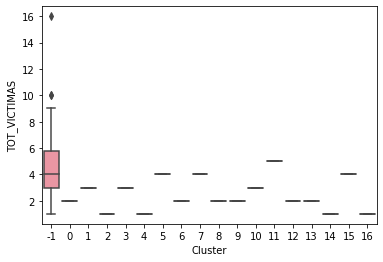

In [32]:
sns.boxplot(data=datos_bp, y='TOT_VICTIMAS', x='Cluster')

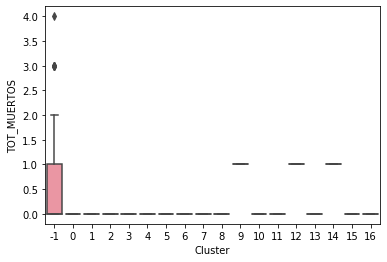

In [33]:
sns.boxplot(data=datos_bp, y='TOT_MUERTOS', x='Cluster')

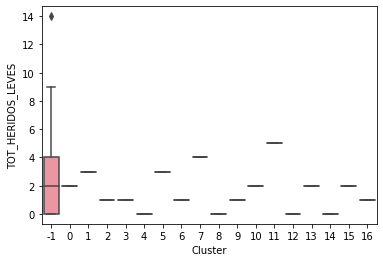

In [34]:
sns.boxplot(data=datos_bp, y='TOT_HERIDOS_LEVES', x='Cluster')

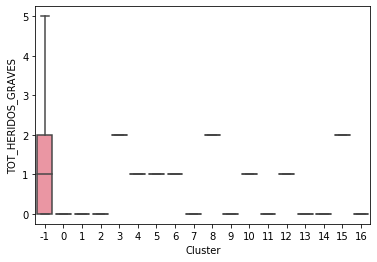

In [35]:
sns.boxplot(data=datos_bp, y='TOT_HERIDOS_GRAVES', x='Cluster')

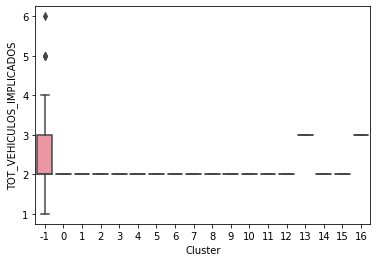

In [36]:
sns.boxplot(data=datos_bp, y='TOT_VEHICULOS_IMPLICADOS', x='Cluster')

## Escenario 2: Fin de semana

### Visualización de datos

In [37]:
datos['DIASEMANA'] = datos['DIASEMANA'].astype(str)
print(Counter(datos['DIASEMANA']))

Counter({'5': 14614, '2': 13527, '4': 13469, '3': 13343, '1': 13185, '6': 11410, '7': 9971})


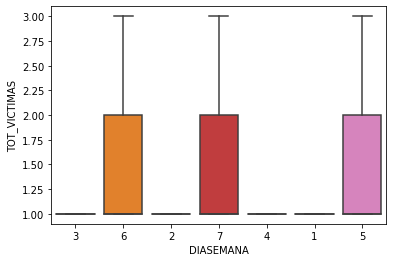

In [38]:
sns.boxplot(data=datos, x='DIASEMANA', y='TOT_VICTIMAS', showfliers = False)

In [39]:
datos['DIASEMANA'] = datos['DIASEMANA'].astype(int)

### Selección de datos

Estudiaremos los datos que representen accidentes en verano.

In [40]:
# Seleccionamos los datos con los que trabajaremos
caso2 = datos[(datos.DIASEMANA == 6) | (datos.DIASEMANA == 7) | (datos.DIASEMANA == 5)]
caso2 = caso2[caso2.DENSIDAD_CIRCULACION == 'DENSA']

In [41]:
# Los atributos a considerar son:
atributos = ['TOT_VICTIMAS', 'TOT_MUERTOS', 'TOT_HERIDOS_GRAVES', 'TOT_HERIDOS_LEVES', 'TOT_VEHICULOS_IMPLICADOS']

In [42]:
# Creamos la matriz con los atributos considerados. No hay valores nulos.
caso2 = caso2[atributos]
caso2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1383 entries, 1 to 89472
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   TOT_VICTIMAS              1383 non-null   int64
 1   TOT_MUERTOS               1383 non-null   int64
 2   TOT_HERIDOS_GRAVES        1383 non-null   int64
 3   TOT_HERIDOS_LEVES         1383 non-null   int64
 4   TOT_VEHICULOS_IMPLICADOS  1383 non-null   int64
dtypes: int64(5)
memory usage: 64.8 KB


### Normalización de los datos

In [43]:
# Le aplicamos normalización a los datos
scaler = MinMaxScaler()
caso2_norm = scaler.fit_transform(caso2)
caso2_norm[:5]

array([[0.   , 0.   , 0.   , 0.1  , 0.25 ],
       [0.   , 0.   , 0.   , 0.1  , 0.   ],
       [0.   , 0.   , 0.   , 0.1  , 0.   ],
       [0.   , 0.   , 0.   , 0.1  , 0.375],
       [0.   , 0.   , 0.   , 0.1  , 0.125]])

### Algoritmos de clustering

#### K-Means

Seleccionamos los parámetros a usar.

In [44]:
# Vectores con los valores de las métricas
s = []
c = []

for i in range(2,15):
    results = KMeans(n_clusters=i, random_state=0).fit(caso2_norm)
    silhouette, calinski = measures_silhoutte_calinski(caso2_norm, results.labels_)
    s.append(silhouette)
    c.append(calinski)

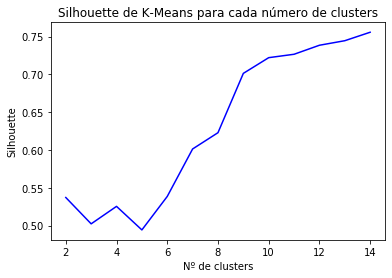

In [45]:
grafica(range(2,15), s, 'Silhouette de K-Means para cada número de clusters', 'Nº de clusters', 'Silhouette')

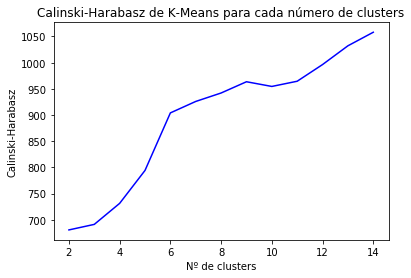

In [46]:
grafica(range(2,15), c, 'Calinski-Harabasz de K-Means para cada número de clusters', 'Nº de clusters', 'Calinski-Harabasz')

In [47]:
print("Silhouette: \n" + str(s))
print()
print("Calinski-Harabasz: \n" + str(c))

Silhouette: 
[0.5370884902834917, 0.5022253639905714, 0.5253455054070136, 0.494182230718928, 0.5384826599151724, 0.601310808513732, 0.622859268196415, 0.7013609213343277, 0.7221502954295131, 0.7266476702162132, 0.7385815169799497, 0.7445925945766767, 0.755793883799247]

Calinski-Harabasz: 
[680.6474578600636, 691.2087946486065, 731.3590806547992, 794.2278720981091, 904.0949725499044, 925.9700253681594, 942.1012174830314, 963.5793862878563, 954.6141788919715, 964.5578901852715, 996.4201247190041, 1032.2367917798642, 1058.1110463372995]


Elegimos usar 9 clusters.

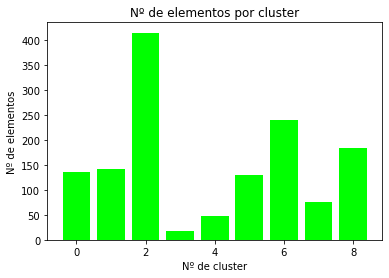

In [48]:
results9 = KMeans(n_clusters=9, random_state=0).fit(caso2_norm)

# Número de elementos por cluster
m = [0 for i in range(9)]

for i in range(len(caso2)):
    m[results9.labels_[i]]+=1
    
graf_barras(range(9), m, "Nº de elementos por cluster","Nº de cluster","Nº de elementos")

In [49]:
# Métricas del modelo
silhouette, calinski = measures_silhoutte_calinski(caso2_norm, results9.labels_)

print("silhouette: {:3f}".format(silhouette))
print("calinsky: {:3f}".format(calinski))

silhouette: 0.701361
calinsky: 963.579386


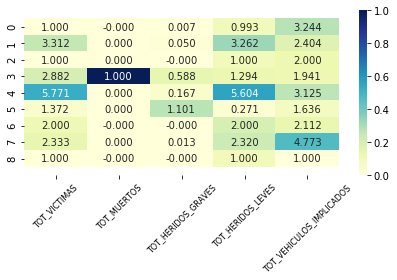

In [50]:
centroids = results9.cluster_centers_
visualize_centroids(centroids, np.array(caso2), atributos)

/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 var

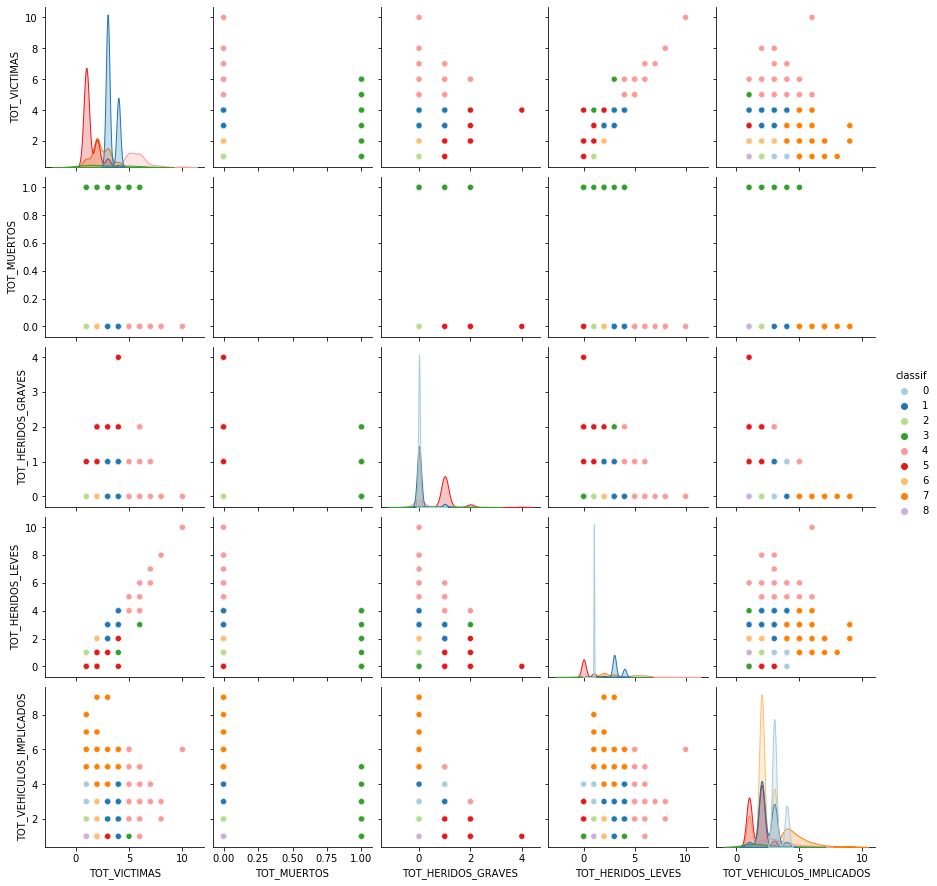

In [51]:
 pairplot(caso2, atributos, results9.labels_)

In [52]:
# Creamos una estructura con los datos y el cluster al que pertenece cada instancia
datos_bp = caso2.copy()
datos_bp['Cluster'] = results9.labels_
datos_bp.head()

,TOT_VICTIMAS,TOT_MUERTOS,TOT_HERIDOS_GRAVES,TOT_HERIDOS_LEVES,TOT_VEHICULOS_IMPLICADOS,Cluster
1,1,0,0,1,3,0
126,1,0,0,1,1,8
194,1,0,0,1,1,8
210,1,0,0,1,4,0
609,1,0,0,1,2,2


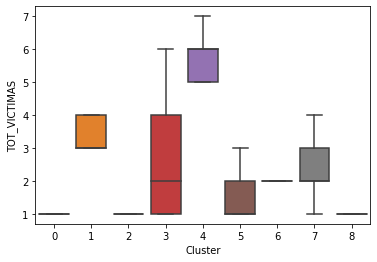

In [53]:
sns.boxplot(data=datos_bp, y='TOT_VICTIMAS', x='Cluster', showfliers = False)

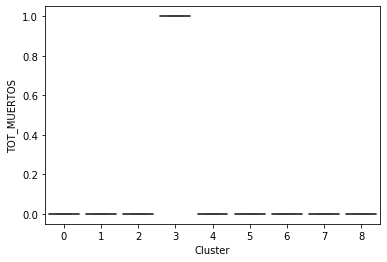

In [54]:
sns.boxplot(data=datos_bp, y='TOT_MUERTOS', x='Cluster', showfliers = False)

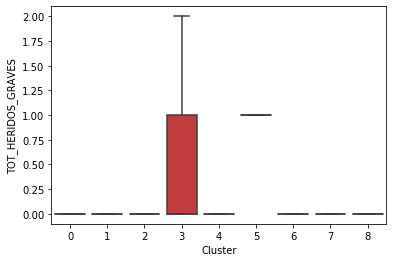

In [55]:
sns.boxplot(data=datos_bp, y='TOT_HERIDOS_GRAVES', x='Cluster', showfliers = False)

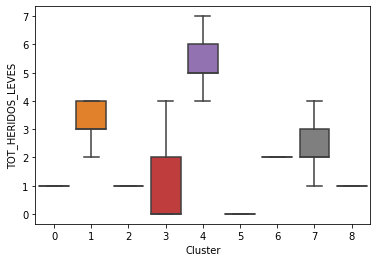

In [56]:
sns.boxplot(data=datos_bp, y='TOT_HERIDOS_LEVES', x='Cluster', showfliers = False)

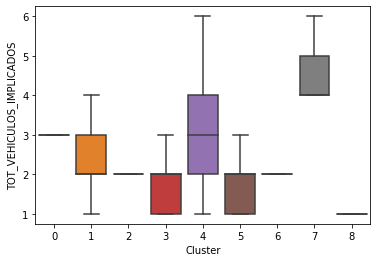

In [57]:
sns.boxplot(data=datos_bp, y='TOT_VEHICULOS_IMPLICADOS', x='Cluster', showfliers = False)

#### DBSCAN

Seleccionamos los parámetros a usar.

In [58]:
# Vectores con los valores de las métricas
s = []
c = []

for i in np.linspace(0.02, 0.2, num=10):
    results = DBSCAN(eps=i, min_samples=5).fit(caso2_norm)
    silhouette, calinski = measures_silhoutte_calinski(caso2_norm, results.labels_)
    s.append(silhouette)
    c.append(calinski)

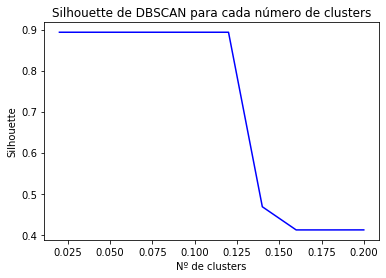

In [59]:
grafica(np.linspace(0.02, 0.2, num=10), s, 'Silhouette de DBSCAN para cada número de clusters', 'Nº de clusters', 'Silhouette')

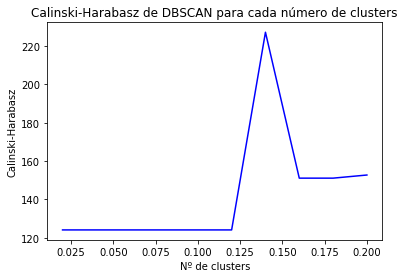

In [60]:
grafica(np.linspace(0.02, 0.2, num=10), c, 'Calinski-Harabasz de DBSCAN para cada número de clusters', 'Nº de clusters', 'Calinski-Harabasz')

In [61]:
print("Silhouette: \n" + str(s))
print()
print("Calinski-Harabasz: \n" + str(c))

Silhouette: 
[0.8934379643459736, 0.8934379643459733, 0.8934379643459736, 0.8934379643459736, 0.8934379643459736, 0.8934379643459733, 0.46816397525012404, 0.4117216974464629, 0.41172169744646275, 0.4117827279234501]

Calinski-Harabasz: 
[124.0538840507491, 124.0538840507491, 124.0538840507491, 124.0538840507491, 124.0538840507491, 124.0538840507491, 227.24590316566974, 151.0794991884267, 151.0794991884267, 152.71320580896457]


Elegimos eps=0.14.

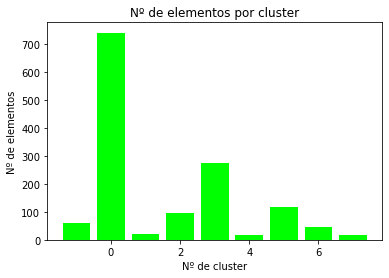

In [62]:
results = DBSCAN(eps=0.14, min_samples=10).fit(caso2_norm)
n = len(np.unique(results.labels_))

# Número de elementos por cluster
m = [0 for i in range(n)]

for i in range(len(caso2_norm)):
    if results.labels_[i]!=-1:
        m[results.labels_[i]+1]+=1
    else:
        m[0]+=1
        
graf_barras(range(-1,n-1), m, "Nº de elementos por cluster","Nº de cluster","Nº de elementos")

In [63]:
# Métricas del modelo
silhouette, calinski = measures_silhoutte_calinski(caso2_norm, results.labels_)

print("silhouette: {:3f}".format(silhouette))
print("calinsky: {:3f}".format(calinski))

silhouette: 0.453612
calinsky: 220.246250


Visualizamos los centroides.

In [64]:
# Creamos una estructura con los datos y el cluster al que pertenece cada instancia
datos_cen = caso2.copy()
datos_cen.columns = atributos
datos_cen['Cluster'] = results.labels_
datos_cen.head()

,TOT_VICTIMAS,TOT_MUERTOS,TOT_HERIDOS_GRAVES,TOT_HERIDOS_LEVES,TOT_VEHICULOS_IMPLICADOS,Cluster
1,1,0,0,1,3,0
126,1,0,0,1,1,0
194,1,0,0,1,1,0
210,1,0,0,1,4,0
609,1,0,0,1,2,0


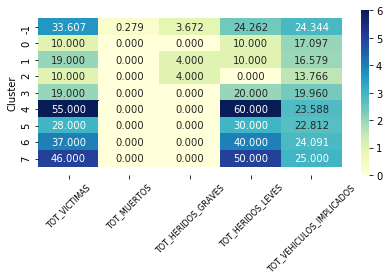

In [65]:
centroids = datos_cen.groupby('Cluster').mean()
visualize_centroids(centroids, np.array(caso2), atributos)

/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 var

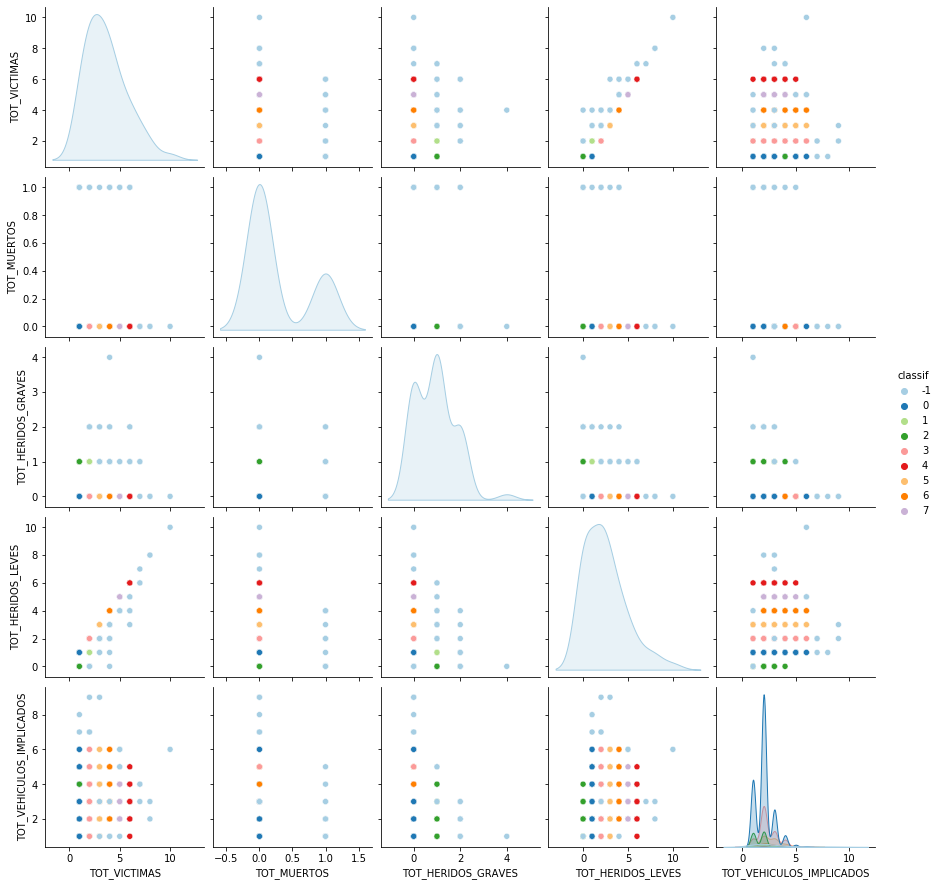

In [66]:
pairplot(caso2, atributos, results.labels_)

In [67]:
# Creamos una estructura con los datos y el cluster al que pertenece cada instancia
datos_bp = pd.DataFrame(caso2)
datos_bp['Cluster'] = results.labels_
datos_bp.head()

,TOT_VICTIMAS,TOT_MUERTOS,TOT_HERIDOS_GRAVES,TOT_HERIDOS_LEVES,TOT_VEHICULOS_IMPLICADOS,Cluster
1,1,0,0,1,3,0
126,1,0,0,1,1,0
194,1,0,0,1,1,0
210,1,0,0,1,4,0
609,1,0,0,1,2,0


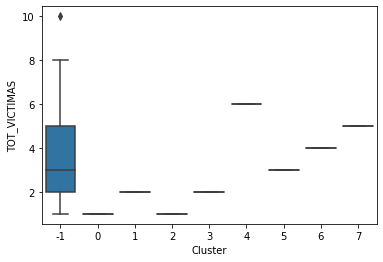

In [68]:
sns.boxplot(data=datos_bp, y='TOT_VICTIMAS', x='Cluster')

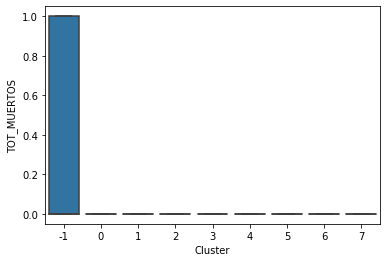

In [69]:
sns.boxplot(data=datos_bp, y='TOT_MUERTOS', x='Cluster')

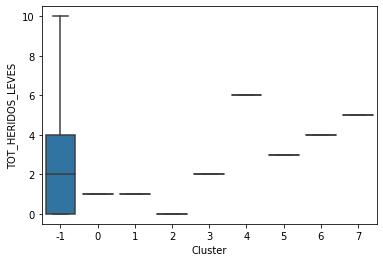

In [70]:
sns.boxplot(data=datos_bp, y='TOT_HERIDOS_LEVES', x='Cluster')

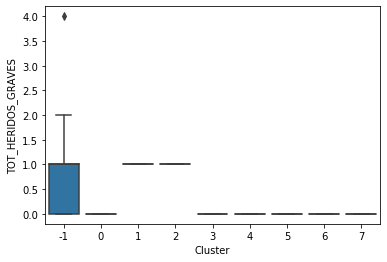

In [71]:
sns.boxplot(data=datos_bp, y='TOT_HERIDOS_GRAVES', x='Cluster')

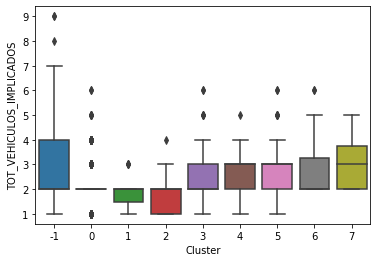

In [72]:
sns.boxplot(data=datos_bp, y='TOT_VEHICULOS_IMPLICADOS', x='Cluster')